## Load Libraries and Dataset

In [ ]:
!pip install -v scikit-learn==0.23.0.

In [ ]:
pip install -v yellowbrick==1.3.post1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ocean-modelB/Data/final_big_five.csv')

In [ ]:
columns = df.columns
print(columns)

Index(['Unnamed: 0', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6',
       'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5',
       'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4',
       'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3',
       'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5


In [ ]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
df.apply(minMax)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
min,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
max,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.00000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000
mean,2.645693,2.795889,3.298964,3.167806,3.297512,2.411223,2.780479,3.443987,2.979535,3.588282,3.310360,3.197204,3.867576,2.689094,2.852700,2.866246,3.063028,2.694104,3.103318,2.795166,2.247902,3.867886,2.270176,3.956921,2.285038,3.778318,2.209351,3.719934,3.807989,3.617462,3.341473,2.949740,4.004439,2.630877,2.634131,2.841238,3.733087,2.480876,3.222857,3.627431,3.703026,2.07053,4.035008,1.995491,3.824307,1.901202,4.022261,3.221340,4.166739,3.983939
std,1.250871,1.306720,1.188259,1.210432,1.239669,1.208842,1.380444,1.242385,1.325278,1.274354,1.318007,1.191387,1.129266,1.227439,1.254425,1.296906,1.270450,1.324289,1.274190,1.305114,1.321227,1.080140,1.266212,1.075868,1.155366,1.165019,1.105146,1.041956,1.131329,1.030953,1.122325,1.372541,0.995169,1.232578,1.254199,1.399420,1.079109,1.120525,1.248199,0.998013,1.100078,1.09506,1.040036,1.071258,0.933451,1.084797,0.935574,1.222737,0.971584,0.986196
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.00000,3.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,2.00000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,3.00000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5

## Combining cloumns

In [ ]:
df['E'] = 20 + df['EXT1'] - df['EXT2'] + df['EXT3'] - df['EXT4'] + df['EXT5'] - df['EXT6'] + df['EXT7'] - df['EXT8'] + df['EXT9'] - df['EXT10']
df['A'] = 14 - df['AGR1'] + df['AGR2'] - df['AGR3'] + df['AGR4'] - df['AGR5'] + df['AGR6'] - df['AGR7'] + df['AGR8'] + df['AGR9'] + df['AGR10']
df['C'] = 14 + df['CSN1'] - df['CSN2'] + df['CSN3'] - df['CSN4'] + df['CSN5'] - df['CSN6'] + df['CSN7'] - df['CSN8'] + df['CSN9'] + df['CSN10']
df['N'] = 38 - df['EST1'] + df['EST2'] - df['EST3'] + df['EST4'] - df['EST5'] - df['EST6'] - df['EST7'] - df['EST8'] - df['EST9'] - df['EST10']
df['O'] = 8 + df['OPN1'] - df['OPN2'] + df['OPN3'] - df['OPN4'] + df['OPN5'] - df['OPN6'] + df['OPN7'] + df['OPN8'] + df['OPN9'] + df['OPN10']

In [ ]:
columns = ['O', 'C', 'E', 'A', 'N']
df = df[columns]

In [ ]:
df.head()

,O,C,E,A,N
0,35,22,36,29,26
1,25,27,10,34,25
2,31,24,15,32,24
3,29,15,16,28,21
4,38,38,19,36,31


In [ ]:
df.apply(minMax)

,O,C,E,A,N
min,0,0,0,0,0
max,40,40,40,40,40


## Deteminimg optimum number of clusters

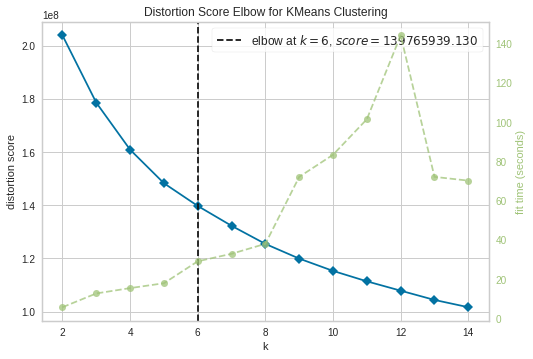

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(df)        
visualizer.show()  

## KMeans Algorithm

In [ ]:
kmeans = KMeans(n_clusters = 6)
k_fit = kmeans.fit(df)

In [ ]:
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head(15)

,O,C,E,A,N,Clusters
0,35,22,36,29,26,1
1,25,27,10,34,25,5
2,31,24,15,32,24,5
3,29,15,16,28,21,2
4,38,38,19,36,31,1
5,34,27,22,28,28,1
6,33,23,25,31,20,3
7,33,35,32,28,34,1
8,25,7,12,9,19,0
9,40,14,19,27,11,3


In [ ]:
counts = df.Clusters.value_counts()
counts = pd.DataFrame(counts)

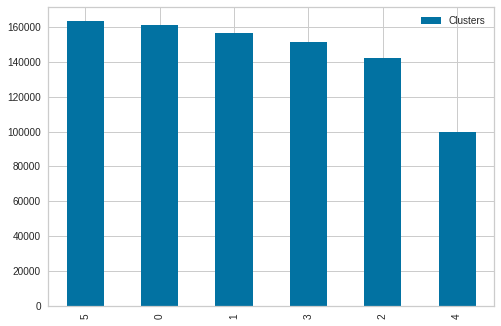

In [ ]:
counts.plot.bar()

In [ ]:
df.head()

,O,C,E,A,N,Clusters
0,35,22,36,29,26,1
1,25,27,10,34,25,5
2,31,24,15,32,24,5
3,29,15,16,28,21,2
4,38,38,19,36,31,1


In [ ]:
columns = df.columns[0:-1]

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data = pca_fit, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,PCA3,Clusters
0,-16.310238,-4.762240,6.959984,1
1,1.667711,8.311921,-6.366763,5
2,-0.977089,4.275881,-2.567444,5
3,3.874158,-0.670665,5.561069,2
4,-13.607433,10.991538,-11.384092,1


Text(0.5, 0.92, 'Personality Clusters after PCA')

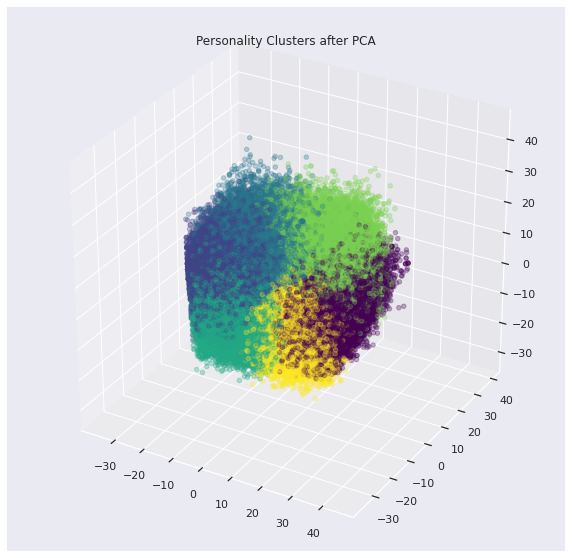

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['Clusters'], cmap='viridis', alpha=0.3)
plt.title('Personality Clusters after PCA')

In [ ]:
pd.options.display.max_columns = 150
df.groupby('Clusters').mean()

,O,C,E,A,N
Clusters,,,,,
0,26.905562,18.222254,11.052087,24.749665,10.558674
1,31.630442,29.330763,28.439245,32.318483,28.291003
2,25.991454,18.780905,22.875412,25.991826,23.957009
3,31.198617,21.181732,27.427912,30.954623,12.655377
4,30.107129,25.349711,11.739110,17.444404,24.684395
5,28.394932,29.120431,14.235054,31.133519,18.299658


## Visualizing scores for clusters

In [ ]:
dataclusters = df.groupby('Clusters').mean()

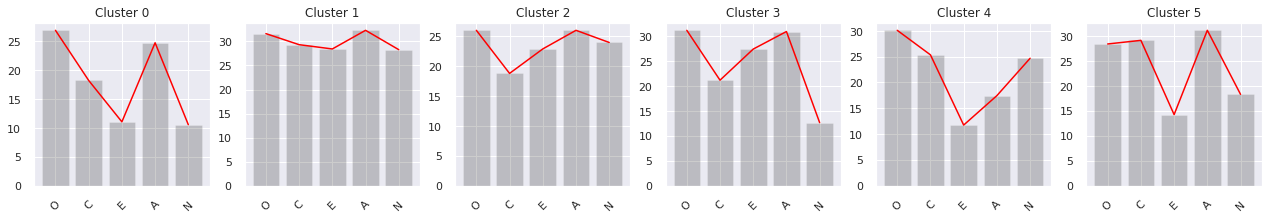

In [ ]:
plt.figure(figsize=(22,3))
for i in range(0, 6):
    plt.subplot(1,6,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], color='black', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i, :], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)

In [ ]:
import pickle
pickle.dump(kmeans, open("/content/drive/MyDrive/ocean-modelB/Data/model.pkl", "wb")) 

In [ ]:
dataclusters = pd.DataFrame(dataclusters)

In [ ]:
dataclusters = dataclusters.round(2)

In [ ]:
dataclusters = dataclusters.apply(lambda x: np.round(x*100/40, 0))
dataclusters.astype('int')

,O,C,E,A,N
Clusters,,,,,
0,67,46,28,62,26
1,79,73,71,81,71
2,65,47,57,65,60
3,78,53,69,77,32
4,75,63,29,44,62
5,71,73,36,78,46


In [ ]:
dataclusters.to_csv('/content/drive/MyDrive/ocean-modelB/Data/clusters.csv')